In this Notebook, we present the basic functionalities of PyClust which include:

1.  The evaluation of clustering algorithms, with the wide variety of internal Cluster Validity Indices (CVIs) Pyclust provides, in the most computationally optimal way.
2.  The extraction of all known Meta-Features that can be used for meta-learning for automated clustering algorithm selection.
3.  The creation of a custom meta-knowledge repository, given the functionalities of PyClust, that will help you train and use your own meta-learner for automated algorithm selection for clustering.

The Notebook follows the following structure:

1. Section 1 - Installing necessary packages: In this Section we install all the necessary packages and their corresponding versions, in order to use PyClust.
2.  Section 2 - Examples: In this Section we provide simple examples on how to use PyClust in order to compute CVIs and Meta-Features. We also provide an example of how one can compare different clustering examples using PyClust's CVIToolbox kit.
3.  Section 3 - Creation of meta-knowledge repository: In this Section we provide detailed instructions on how to create your own meta-knowledge repository and use it to train your own meta-learner.

# Installing necessary libraries

In [24]:
import sys
sys.path.append('/Users/dimitrispetratos/Documents/GitHub/pyclustkit')

# Examples

In [42]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from pyclustkit.eval import CVIToolbox
from pyclustkit.metalearning import MFExtractor
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
import itertools

In [241]:
# Load a toy dataset
x = load_iris()['data']

## Calculating CVIs

Fistrly we will conduct clustering using KMeans and DBSCAN with their default parameters.

In [44]:
kmeans = KMeans().fit(x)
dbscan = DBSCAN().fit(x)

Then we will get the labels of the conducted clustering.

In [45]:
labels_km = kmeans.labels_
labels_dbscan = dbscan.labels_

Finally we will calculate two CVIs (here Dunn index and Silhouette score) with PyClust for the clustering conducted above with KMeans and DBSCAN.

In [46]:
ct_km = CVIToolbox(x,labels_km)
ct_km.calculate_icvi(cvi=["dunn", "silhouette"]) # if no CVI are specified it defaults to 'all'.

print("CVIs for KMeans:")
print(ct_km.cvi_results)

print("="*64)
ct_dbscan = CVIToolbox(x, labels_dbscan)
ct_dbscan.calculate_icvi(cvi=["dunn", "silhouette"])

print("CVIs for DBSCAN:")
print(ct_dbscan.cvi_results)

CVIs for KMeans:
{'dunn': 0.09759000729485341, 'silhouette': 0.35377644598318336}
CVIs for DBSCAN:
{'dunn': 0.07543555587646832, 'silhouette': 0.48603419703456885}


The complete set of CVIs PyClust can calculate is listed in our [GitHub repository](https://github.com/yannispoulakis/pyclustkit).

## Calculating Meta-Features

The following code snippet calculates all meta-features beloning to a specific category (here "descriptive" meta-features are chosen).

In [258]:
# Create a MFExtractor instance
mfe = MFExtractor(x)
# Calculate Meta-Features based on 'category'
mfe.calculate_mf(included_in="Ferrari")
# Search Meta-Features based on 'category' and define 'search_type' to be 'valuesl'
print(mfe.search_mf(included_in="Ferrari", search_type="values")["ferrari_distance_based"])

{'Mean': 2.5446414657151366, 'Variance': 2.670713904922852, 'Standard deviation': 1.6342319005951549, 'Skewness': 0.3857699425503438, 'Kurtosis': -0.9838779206348587, '% of values in [0, 0.1]': 0.0003579418344519016, '% of values in [0.1, 0.2]': 0.005011185682326622, '% of values in [0.2, 0.3]': 0.009932885906040268, '% of values in [0.3, 0.4]': 0.023624161073825502, '% of values in [0.4, 0.5]': 0.02666666666666667, '% of values in [0.5, 0.6]': 0.03552572706935123, '% of values in [0.6, 0.7]': 0.03355704697986577, '% of values in [0.7, 0.8]': 0.034809843400447425, '% of values in [0.8, 0.9]': 0.03436241610738255, '% of values in [0.9, 1]': 0.031767337807606266, '% of values with |Z-score| in [0,1)': 0.2839373601789709, '% of values with |Z-score| in [1,2)': 0.167337807606264, '% of values with |Z-score| in [2,3)': 0.02505592841163311, '% of values with |Z-score| in [3, infinity)': 0.0}


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/dimitrispetratos/Documents/GitHub/pyclustkit/pyclustkit/metalearning/statistics.py:46: UserWarning: This function uses -skewness_vector- as a global variable to avoid multiple computations.
  warnings.warn("This function uses -skewness_vector- as a global variable to avoid multiple computations.")
/Users/dimitrispetratos/Documents/GitHub/pyclustkit/pyclustkit/metalearning/statistics.py:174: UserWarning: This function uses -skewness_vector- as a global variable to avoid multiple computations.
  warnings.warn("This function uses -skewness_vector- as a global variable to avoid multiple

There are plenty of options we can define:

1. calculate_mf(name, category, included_in):
    
    a. Parameter name defines the name of a Meta-feature to be computed (e.g. "log10_no_instances")

    b. Parameter category defines the category of Meta-Features to be computes (possible choices: "landmark", "statistics", "descriptive", "similarity-vector")

    c. Parameter included_in defines the source paper that those Meta-Features are included in.

2. search_mf(name, category, included_in, search_type):

    a. Parameter name defines the name of a Meta-feature to be computed (e.g. 'log10_no_instances' - - see [pyclustkit documentation](https://github.com/yannispoulakis/pyclustkit) for further references)

    b. Parameter category defines the category of Meta-Features to be computes (possible choices: "landmark", "statistics", "descriptive", "similarity-vector" - - see [pyclustkit documentation](https://github.com/yannispoulakis/pyclustkit) for further references)

    c. Parameter included_in defines the source paper that those Meta-Features are included in (possible choices: "Ferrari", "Souto", "Nascimento", "Vukicevic", "AutoClust", "TPE-AutoClust", 'Marco-GE', "AutoCluster", "cSmartML", "Pimentel" - see [pyclustkit documentation](https://github.com/yannispoulakis/pyclustkit) for further references).

    d. Parameter search_type defines what to get from MFExtractor instance (possible choices: "full_search", "values", "names"). If search_type="values" then a dictionary with the corresponding Meta-Features will be returned.

The complete set of Meta-Features PyClust can compute is listed in our [GitHub repository](https://github.com/yannispoulakis/pyclustkit).

# Creation of Meta-Knowledge repository

In this Section we will give the necessary instructions in order to create a Meta-Knowldge repository and use it to train your own meta-learner programmatically.

![Alt text](mk-repo.png)

In order to make a Meta-Knowledge repository we need to:

1. Map its dataset to a Meta-Feature vector. We will do that using PyClust's MFExtractor class.

2. Map its dataset to a specific algorithm. For that reason we will run an exhaustive search over the hyper-parameter spaces defined below for the algorithms of: K-Means, Agglomerative Clustering and Spectral Clustering using scikit-learn. After that, using PyClust's CVIToolbox we will evaluate each clustering result and choose the best algorithm for a given dataset, based on a selected CVI.

Merging the datasets' Meta-Feature vectors with their corresponding class will give us the Meta-Knowledge repository we need to train a Meta-Learner.

First of all we need to conduct an exhaustive search for a set of algorithms and their corresponding hyperparameters. For our example we will use KMeans, Agglomerative Clustering and Spectral Clustering.

In [178]:
# We begin by defining the hyper-parameters space for each algorithm
kmeans_params = {"n_clusters": [2, 5]}
agglo_params = {"n_clusters": [8, 12], 
                "linkage": ["ward", "complete"]}
spectral_params = {"n_clusters": [15, 20],
                   "n_components": [2, 5, 10]}

Then we will define a class that will help us conduct Exhaustive Search for a given algorithm, among all possible combinations of its parameter-space and return the best configuration given a target CVI.

In [179]:
# We create a class to run exchaustive search and get the best configuration
class ExchaustiveSearch:
  def __init__(self, data, parameter_space, index, algorithm):
    self.data = data
    self.parameter_space = parameter_space
    self.index = index
    self.algorithm = algorithm

    self.search_space = pd.DataFrame()
  
  def set_data(self, data):
    self.data = data
  
  def set_parameter_space(self, parameter_space):
    self.parameter_space = parameter_space
  
  def set_index(self, index):
    self.index = index
  
  def create_combinations(self):
    """
    This method creates all possible combinations of the hyper-parameters space.
    """
    params = list(self.parameter_space.keys())
    values = list(self.parameter_space.values())

    combinations = list(itertools.product(*values))

    self.search_space = pd.DataFrame(combinations, columns=params)

  def run(self):
    """
    This method runs the algorithm for each combination of hyper-parameters.
    """
    n = self.search_space.shape[0]
    results = []
    for i in range(n):
      params = {k: (int(v) if isinstance(v, float) and v.is_integer() else v) for k, v in self.search_space.iloc[i].to_dict().items()}
      if self.algorithm == 'KMeans':
        model = KMeans(**params).fit(self.data)
      elif self.algorithm == 'DBSCAN':
        model = DBSCAN(**params).fit(self.data)
      elif self.algorithm == 'SpectralClustering':
        model = SpectralClustering(**params).fit(self.data)
      else:
        model = AgglomerativeClustering(**params).fit(self.data)
      
      labels = model.labels_
      ct = CVIToolbox(self.data, labels)
      ct.calculate_icvi(cvi=[self.index])
      result = ct.cvi_results[self.index]
      results.append(result)
    
    self.search_space[self.index] = results 
  
  def get_best_config(self):
    """
    This method returns the best configuration based on the specified index.
    """
    return self.search_space.sort_values(by=self.index, ascending=False).iloc[0]

In [180]:
# Usage example of the class ExhaustiveSearch
km = ExchaustiveSearch(x, kmeans_params, 'silhouette', 'KMeans')
km.create_combinations()
km.run()

In [181]:
# This prints to the screen the best configuration along with the value of the selected CVI (here Silhouette score)
km.get_best_config()

n_clusters    2.000000
silhouette    0.681046
Name: 0, dtype: float64

In [182]:
# For simplicity we will wrap together all parameter-spaces
param_space = {'KMeans': kmeans_params, 'AgglomerativeClustering': agglo_params, 'SpectralClustering': spectral_params}

In [183]:
# Then we will create a method which will rank the algorithms based on the performance of the selected CVI upon all possible combinations of parameters
def rank_algorithms(data, space, index):
  ranking = []
  for algorithm in space.keys():
    es = ExchaustiveSearch(data, space[algorithm], index, algorithm)
    es.create_combinations()
    es.run()
    ranking.append((algorithm, es.get_best_config()[index]))
  
  ranking = pd.DataFrame(ranking, columns=['algorithm', index], index=None)
  ranking = ranking.sort_values(by=index, ascending=False)
  return ranking.reset_index(drop=True)

In [184]:
# Usage example
ranks = rank_algorithms(x, param_space, 'silhouette')

/Users/dimitrispetratos/Documents/GitHub/pyclustkit/pyclustkit/eval/_cvi_toolbox.py:131: RuntimeWarning: invalid value encountered in divide
  intra_dist = {x: np.sum(y, axis=1) / (y.shape[1] - 1) for x, y in intra_dist.items()}
/Users/dimitrispetratos/Documents/GitHub/pyclustkit/pyclustkit/eval/_cvi_toolbox.py:131: RuntimeWarning: invalid value encountered in divide
  intra_dist = {x: np.sum(y, axis=1) / (y.shape[1] - 1) for x, y in intra_dist.items()}
/Users/dimitrispetratos/Documents/GitHub/pyclustkit/pyclustkit/eval/_cvi_toolbox.py:131: RuntimeWarning: invalid value encountered in divide
  intra_dist = {x: np.sum(y, axis=1) / (y.shape[1] - 1) for x, y in intra_dist.items()}
/Users/dimitrispetratos/Documents/GitHub/pyclustkit/pyclustkit/eval/_cvi_toolbox.py:131: RuntimeWarning: invalid value encountered in divide
  intra_dist = {x: np.sum(y, axis=1) / (y.shape[1] - 1) for x, y in intra_dist.items()}
/Users/dimitrispetratos/Documents/GitHub/pyclustkit/pyclustkit/eval/_cvi_toolbox.py:

In [185]:
ranks

,algorithm,silhouette
0,KMeans,0.681046
1,AgglomerativeClustering,0.343591
2,SpectralClustering,0.278991


Next, we will generate synthetic datasets and conduct exhaustive search. We will also extract for each dataset a set of meta-features. For the scope of this example, we will extract the meta-features described in [Y. Poulakis, C. Doulkeridis and D. Kyriazis, "AutoClust: A Framework for Automated Clustering Based on Cluster Validity Indices," 2020 IEEE International Conference on Data Mining (ICDM), 2020, pp. 1220-1225, doi: 10.1109/ICDM50108.2020.00153.](https://ieeexplore.ieee.org/document/9338346)

Then we will choose as a meta-learner a classification model (a decission tree model that, as described in our paper, provide explainable results) and train it with the meta-feature vectors extracted, having as a target class the best performing algorithm found from the exchaustive search procedure.

In [277]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


def create_synthetic_datasets(category=None, included_in=None):
  """
  This method creates synthetic datasets and return a Pandas DataFrame which rows correspond to different 
  generated datasets and theor corresponing meta-features. This DataFrame will also contain a column
  regrding the class of the best selected algorithm for each dataset.
  """

  meta_features = []
  best_algorithm = []

  n_samples = [50, 100, 150, 200]
  n_features = [5, 15, 20]
  cluster_std = [0.5, 1]
  centers = [2, 5, 8, 12, 15, 20]

  for samples in n_samples:
    for features in n_features:
      for std in cluster_std:
        for c in centers:
          # generate blobs
          data, _ = make_blobs(n_samples=samples, n_features=features, cluster_std=std, centers=c)
          mfe = MFExtractor(data)
          mfe.calculate_mf(category=category, included_in=included_in)
          if included_in == "Ferrari":
            mfs = list(mfe.search_mf(category=category, included_in=included_in, search_type="values")["ferrari_distance_based"].values())
          else:
            mfs = list(mfe.search_mf(category=category, included_in=included_in, search_type="values").values())
          meta_features.append(mfs)
          ranks = rank_algorithms(data, param_space, 'silhouette')
          best_algorithm.append(ranks.algorithm.iloc[0])
  
  if included_in == "Ferrari":
    names = list(mfe.search_mf(category=category, included_in=included_in, search_type="values")["ferrari_distance_based"].keys())
  else:
    names = mfe.search_mf(category=category, included_in=included_in, search_type="names")
  df = pd.DataFrame(meta_features, columns=names)
  df['best_algorithm'] = best_algorithm

  return df

In [262]:
mk_repo = create_synthetic_datasets(included_in="Ferrari")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/dimitrispetratos/Documents/GitHub/pyclustkit/pyclustkit/metalearning/statistics.py:46: UserWarning: This function uses -skewness_vector- as a global variable to avoid multiple computations.
  warnings.warn("This function uses -skewness_vector- as a global variable to avoid multiple computations.")
/Users/dimitrispetratos/Documents/GitHub/pyclustkit/pyclustkit/metalearning/statistics.py:174: UserWarning: This function uses -skewness_vector- as a global variable to avoid multiple computations.
  warnings.warn("This function uses -skewness_vector- as a global variable to avoid multiple

In [263]:
mk_repo

,Mean,Variance,Standard deviation,Skewness,Kurtosis,"% of values in [0, 0.1]","% of values in [0.1, 0.2]","% of values in [0.2, 0.3]","% of values in [0.3, 0.4]","% of values in [0.4, 0.5]","% of values in [0.5, 0.6]","% of values in [0.6, 0.7]","% of values in [0.7, 0.8]","% of values in [0.8, 0.9]","% of values in [0.9, 1]","% of values with |Z-score| in [0,1)","% of values with |Z-score| in [1,2)","% of values with |Z-score| in [2,3)","% of values with |Z-score| in [3, infinity)",best_algorithm
0,12.343531,114.411723,10.696342,-0.040126,-1.989839,0.0,0.0,0.0,0.003265,0.001633,0.004898,0.014694,0.017959,0.023673,0.026122,0.327347,0.182857,0.000000,0.0,KMeans
1,13.281447,44.844336,6.696591,-0.522276,-0.434613,0.0,0.0,0.0,0.000000,0.000816,0.001633,0.004898,0.004898,0.005714,0.009796,0.558367,0.096327,0.000000,0.0,KMeans
2,15.466535,42.832091,6.544623,-1.009660,0.064141,0.0,0.0,0.0,0.000000,0.000816,0.001633,0.000816,0.002449,0.003265,0.003265,0.513469,0.124898,0.000000,0.0,AgglomerativeClustering
3,16.061375,32.133333,5.668627,-0.817583,0.826558,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.001633,0.003265,0.003265,0.385306,0.129796,0.013061,0.0,AgglomerativeClustering
4,16.407355,34.906653,5.908185,-0.401282,0.482641,0.0,0.0,0.0,0.000000,0.000000,0.002449,0.001633,0.002449,0.000816,0.000816,0.373061,0.122449,0.022857,0.0,SpectralClustering
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,28.946641,138.045068,11.749258,-1.133304,0.012252,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700201,0.080101,0.000000,0.0,KMeans
140,34.419255,136.855429,11.698523,-1.387578,1.382832,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.545427,0.078191,0.000000,0.0,AgglomerativeClustering
141,35.317219,88.632874,9.414503,-2.153484,4.413441,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.573116,0.058744,0.000000,0.0,AgglomerativeClustering
142,34.773921,72.530765,8.516500,-2.134028,5.075837,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.545980,0.071608,0.000000,0.0,SpectralClustering


In [264]:
print(f'Meta-Knowledge repository contains: {mk_repo.shape[0]} instances and {mk_repo.shape[1]-1} features.')

Meta-Knowledge repository contains: 144 instances and 19 features.


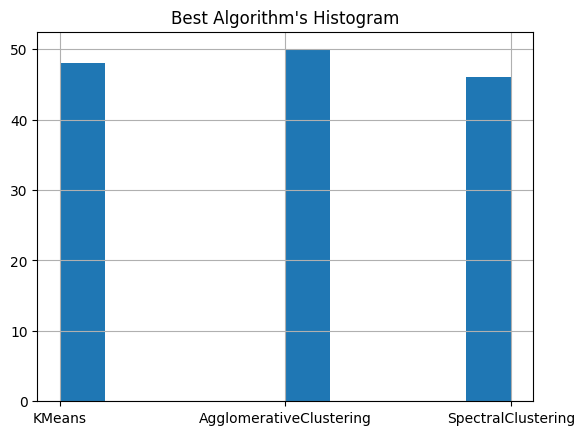

In [265]:
mk_repo['best_algorithm'].hist()
plt.title("Best Algorithm's Histogram")
plt.show()

In [266]:
x , y = mk_repo.drop('best_algorithm', axis=1), mk_repo['best_algorithm']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [267]:
print(f'X_train shape: {x_train.shape}, y_train shape: {y_train.shape}\nX_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (115, 19), y_train shape: (115,)
X_test shape: (29, 19), y_test shape: (29,)


In [268]:
dt = DecisionTreeClassifier().fit(x_train, y_train)

In [276]:
print(f'Train Accuracy: {round(accuracy_score(dt.predict(x_train), y_train), 3)}')
print(f'Test Accuracy: {round(accuracy_score(dt.predict(x_test), y_test), 3)}')
print("="*30)
print(f'Train weighted-F1-Score: {round(f1_score(dt.predict(x_train), y_train, average="weighted"), 3)}')
print(f'Test weighted-F1-Score: {round(f1_score(dt.predict(x_test), y_test, average="weighted"), 3)}')

Train Accuracy: 1.0
Test Accuracy: 0.828
Train weighted-F1-Score: 1.0
Test weighted-F1-Score: 0.829


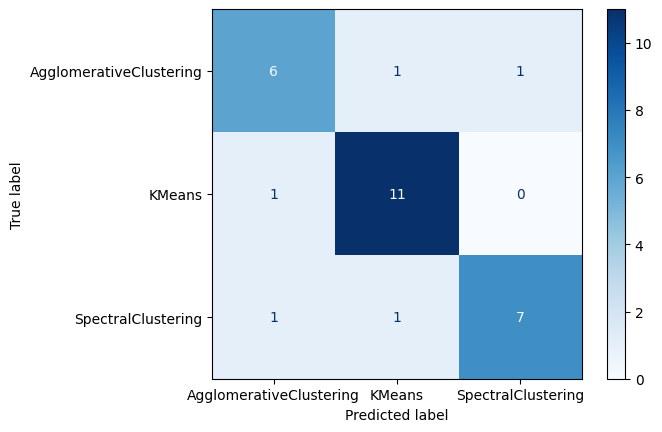

In [281]:
cm = confusion_matrix(y_test, dt.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp = ConfusionMatrixDisplay.from_predictions(
    y_test, dt.predict(x_test), cmap=plt.cm.Blues
)
plt.show()